Implementation of neural network from scratch using NumPy :

DNN(Deep neural network) in a machine learning algorithm that is inspired by the way the human brain works. DNN is mainly used as a classification algorithm. In this article, we will look at the stepwise approach on how to implement the basic DNN algorithm in NumPy(Python library) from scratch. 

The purpose of this article is to create a sense of understanding that, how neural network works and its implementation details. We are going to build a three-letter(A, B,c) classifier, for simplicity we are going to create the letters (A, B,c) as NumPy array of 0s and 1s, also we are going to ignore the bias term related with each node. 

In [16]:
# Creating data set

# A
a =[0, 0, 1, 1, 0, 0,
0, 1, 0, 0, 1, 0,
1, 1, 1, 1, 1, 1,
1, 0, 0, 0, 0, 1,
1, 0, 0, 0, 0, 1]
# B
b =[0, 1, 1, 1, 1, 0,
0, 1, 0, 0, 1, 0,
0, 1, 1, 1, 1, 0,
0, 1, 0, 0, 1, 0,
0, 1, 1, 1, 1, 0]
# C
c =[0, 1, 1, 1, 1, 0,
0, 1, 0, 0, 0, 0,
0, 1, 0, 0, 0, 0,
0, 1, 0, 0, 0, 0,
0, 1, 1, 1, 1, 0]

# Creating labels
y =[[1, 0, 0],
[0, 1, 0],
[0, 0, 1]]


Visualization of data set :

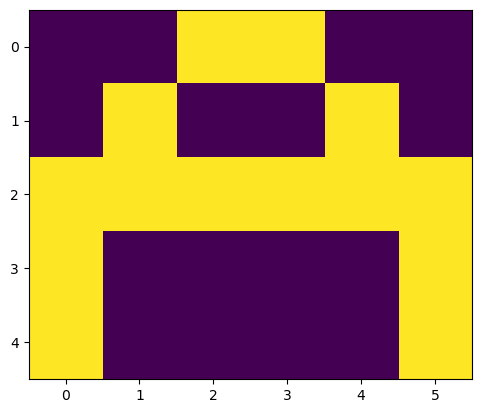

In [13]:
import numpy as np
import matplotlib.pyplot as plt
# visualizing the data, plotting A.
plt.imshow(np.array(a).reshape(5, 6))
plt.show()


As the data set is in the form of list we will convert it into numpy array :

In [3]:
# converting data and labels into numpy array

"""
Convert the matrix of 0 and 1 into one hot vector 
so that we can directly feed it to the neural network,
these vectors are then stored in a list x.
"""

x =[np.array(a).reshape(1, 30), np.array(b).reshape(1, 30), 
								np.array(c).reshape(1, 30)]


# Labels are also converted into NumPy array
y = np.array(y)


print(x, "\n\n", y)


[array([[0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 1]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 0]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 1, 1, 1, 1, 0]])] 

 [[1 0 0]
 [0 1 0]
 [0 0 1]]


 Defining the architecture or structure of the deep neural network. This includes deciding the number of layers and the number of nodes in each layer. Our neural network is going to have the following structure. 


1st layer: Input layer(1, 30)

2nd layer: Hidden layer (1, 5)

3rd layer: Output layer(3, 3)

Declaring and defining all the function to build deep neural network :

In [4]:
# activation function

def sigmoid(x):
	return(1/(1 + np.exp(-x)))

# Creating the Feed forward neural network
# 1 Input layer(1, 30)
# 1 hidden layer (1, 5)
# 1 output layer(3, 3)

def f_forward(x, w1, w2):
	# hidden
	z1 = x.dot(w1)# input from layer 1 
	a1 = sigmoid(z1)# out put of layer 2 
	
	# Output layer
	z2 = a1.dot(w2)# input of out layer
	a2 = sigmoid(z2)# output of out layer
	return(a2)

# initializing the weights randomly
def generate_wt(x, y):
	l =[]
	for i in range(x * y):
		l.append(np.random.randn())
	return(np.array(l).reshape(x, y))
	
# for loss we will be using mean square error(MSE)
def loss(out, Y):
	s =(np.square(out-Y))
	s = np.sum(s)/len(y)
	return(s)

# Back propagation of error 
def back_prop(x, y, w1, w2, alpha):
	
	# hidden layer
	z1 = x.dot(w1)# input from layer 1 
	a1 = sigmoid(z1)# output of layer 2 
	
	# Output layer
	z2 = a1.dot(w2)# input of out layer
	a2 = sigmoid(z2)# output of out layer
	# error in output layer
	d2 =(a2-y)
	d1 = np.multiply((w2.dot((d2.transpose()))).transpose(), 
								(np.multiply(a1, 1-a1)))

	# Gradient for w1 and w2
	w1_adj = x.transpose().dot(d1)
	w2_adj = a1.transpose().dot(d2)
	
	# Updating parameters
	w1 = w1-(alpha*(w1_adj))
	w2 = w2-(alpha*(w2_adj))
	
	return(w1, w2)

def train(x, Y, w1, w2, alpha = 0.01, epoch = 10):
	acc =[]
	losss =[]
	for j in range(epoch):
		l =[]
		for i in range(len(x)):
			out = f_forward(x[i], w1, w2)
			l.append((loss(out, Y[i])))
			w1, w2 = back_prop(x[i], y[i], w1, w2, alpha)
		print("epochs:", j + 1, "======== acc:", (1-(sum(l)/len(x)))*100) 
		acc.append((1-(sum(l)/len(x)))*100)
		losss.append(sum(l)/len(x))
	return(acc, losss, w1, w2)

def predict(x, w1, w2):
	Out = f_forward(x, w1, w2)
	maxm = 0
	k = 0
	for i in range(len(Out[0])):
		if(maxm<Out[0][i]):
			maxm = Out[0][i]
			k = i
	if(k == 0):
		print("Image is of letter A.")
	elif(k == 1):
		print("Image is of letter B.")
	else:
		print("Image is of letter C.")
	plt.imshow(x.reshape(5, 6))
	plt.show() 




Initializing the weights, as the neural network is having 3 layers, so there will be 2 weight matrix associate with it. The size of each matrix depends on the number of nodes in two connecting layers. 

In [5]:
w1 = generate_wt(30, 5)
w2 = generate_wt(5, 3)
print(w1, "\n\n", w2)


[[-0.88459999  1.55108243 -0.68191007  1.4941737  -0.20214526]
 [-0.01345994 -1.40872449  0.48876301  0.30043557 -0.47249162]
 [ 1.04219377 -0.46810173  0.10808897 -0.27728146  1.16087774]
 [ 0.25492053 -0.22056925 -0.61592721 -0.42961177  1.29483473]
 [-0.68705296  0.84369431  0.28870114 -1.54119099  0.02245592]
 [ 0.88901799  0.70505738 -0.61944007  1.90209126  0.7876968 ]
 [ 0.35165701 -0.18314469 -1.1567918   0.79605232  1.2210665 ]
 [-1.67801935 -0.24791832  1.08267622  0.26107832  0.31034429]
 [ 0.61026916  2.66379229  0.9523224   0.60656489  0.19996316]
 [-0.14357472 -1.0024362   1.09042281  0.4223033  -0.62341704]
 [ 1.37083338  3.2112482   0.43545647  0.59199907  1.30975862]
 [-0.58982963 -0.55992494  0.46531654  0.1876378   1.04386167]
 [ 0.94486751  0.01328296  0.25621165 -0.62373137  0.4359821 ]
 [-1.47953227 -0.76229958 -1.70669169 -0.52910569  1.98753828]
 [ 0.77466891 -0.47408901 -1.03109433  0.14674926 -0.81073396]
 [-0.25453867  0.08456557 -0.42722831  0.11256375 -1.03

Training the model :

In [6]:
"""The arguments of train function are data set list x, 
correct labels y, weights w1, w2, learning rate = 0.1, 
no of epochs or iteration.The function will return the
matrix of accuracy and loss and also the matrix of 
trained weights w1, w2"""

acc, losss, w1, w2 = train(x, y, w1, w2, 0.1, 100)


epochs: 1 ======== acc: 77.23934947781602
epochs: 2 ======== acc: 78.77734876736638
epochs: 3 ======== acc: 80.27261458318242
epochs: 4 ======== acc: 81.61859725607255
epochs: 5 ======== acc: 82.74205768133996
epochs: 6 ======== acc: 83.65480688112281
epochs: 7 ======== acc: 84.40674444631519
epochs: 8 ======== acc: 85.043846892985
epochs: 9 ======== acc: 85.59864048566158
epochs: 10 ======== acc: 86.09278007117582
epochs: 11 ======== acc: 86.54073488303246
epochs: 12 ======== acc: 86.95239751186406
epochs: 13 ======== acc: 87.33472297320071
epochs: 14 ======== acc: 87.69274569882216
epochs: 15 ======== acc: 88.03021949758661
epochs: 16 ======== acc: 88.35002661758831
epochs: 17 ======== acc: 88.65444192175235
epochs: 18 ======== acc: 88.94530451900303
epochs: 19 ======== acc: 89.22413003828147
epochs: 20 ======== acc: 89.4921851720705
epochs: 21 ======== acc: 89.75053863908741
epochs: 22 ======== acc: 90.00009764043189
epochs: 23 ======== acc: 90.24163540191228
epochs: 24 ======== acc

Plotting the graphs of loss and accuracy with respect to number of epochs(Iteration). 

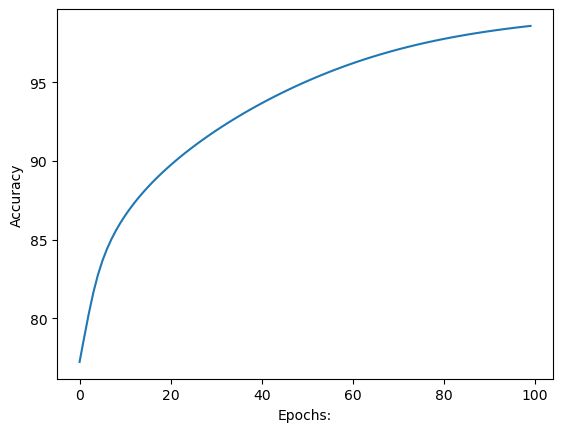

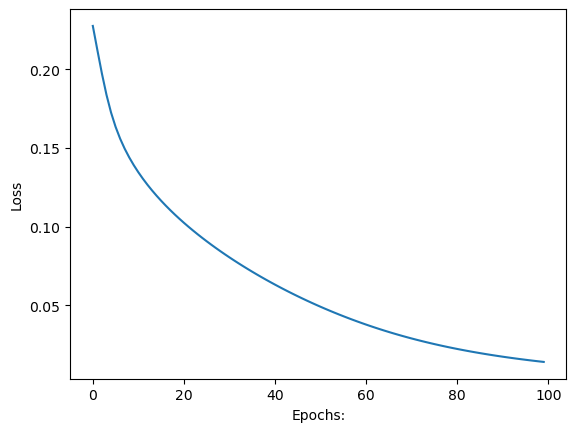

In [7]:
import matplotlib.pyplot as plt1

# plotting accuracy
plt1.plot(acc)
plt1.ylabel('Accuracy')
plt1.xlabel("Epochs:")
plt1.show()

# plotting Loss
plt1.plot(losss)
plt1.ylabel('Loss')
plt1.xlabel("Epochs:")
plt1.show()


In [8]:
# the trained weights are
print(w1, "\n", w2)


[[-0.88459999  1.55108243 -0.68191007  1.4941737  -0.20214526]
 [-0.21441295 -1.414209    0.77546785  0.45369765 -0.48657704]
 [ 0.88014596 -0.22794052  0.39902723 -0.69583085  1.18024485]
 [ 0.09287272  0.01959197 -0.32498895 -0.84816117  1.31420184]
 [-0.88800597  0.83820981  0.57540598 -1.38792891  0.0083705 ]
 [ 0.88901799  0.70505738 -0.61944007  1.90209126  0.7876968 ]
 [ 0.35165701 -0.18314469 -1.1567918   0.79605232  1.2210665 ]
 [-1.84006715 -0.00775711  1.37361448 -0.15747108  0.3297114 ]
 [ 0.61026916  2.66379229  0.9523224   0.60656489  0.19996316]
 [-0.14357472 -1.0024362   1.09042281  0.4223033  -0.62341704]
 [ 1.57377406  3.46104208 -0.39939455  0.74266735  1.30091145]
 [-0.58982963 -0.55992494  0.46531654  0.1876378   1.04386167]
 [ 0.98377271  0.25892868  0.26044507 -1.19554285  0.46943463]
 [-1.64158008 -0.52213837 -1.41575342 -0.94765508  2.00690539]
 [ 0.97760958 -0.22429513 -1.86594535  0.29741754 -0.81958112]
 [-0.051598    0.33435945 -1.26207932  0.26323203 -1.04

Making prediction :

Image is of letter B.


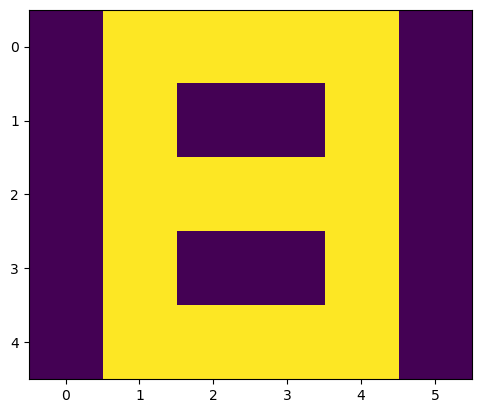

In [9]:
"""
The predict function will take the following arguments:
1) image matrix
2) w1 trained weights
3) w2 trained weights
"""
predict(x[1], w1, w2)


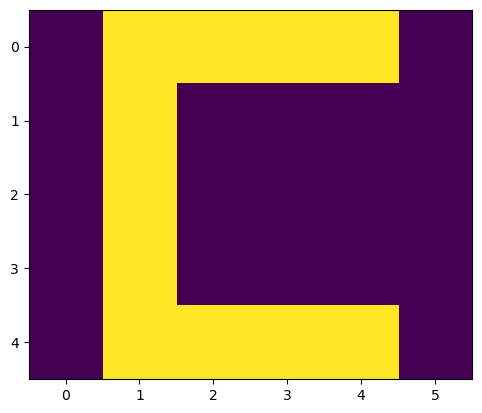

In [17]:
import numpy as np
import matplotlib.pyplot as plt
# visualizing the data, plotting A.
plt.imshow(np.array(c).reshape(5, 6))
plt.show()